<a href="https://colab.research.google.com/github/hcantekin/hcantekin.github.io/blob/main/titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
pip install sweetviz

In [ ]:
import sweetviz

In [ ]:
# loading in titanic dataset
df = pd.read_csv("Titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#  doing some initial analysis with sweetviz
sweetviz_report = sweetviz.analyze(df)
sweetviz_report.show_html('sweetviz_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
# checking how many null values in data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# dropping cabin column because lack of values
df.drop(columns=['Cabin'], inplace=True)

Percentage of passengers in Class 3 who survived: 24.24%
Percentage of passengers in Class 1 who survived: 62.96%
Percentage of passengers in Class 2 who survived: 47.28%


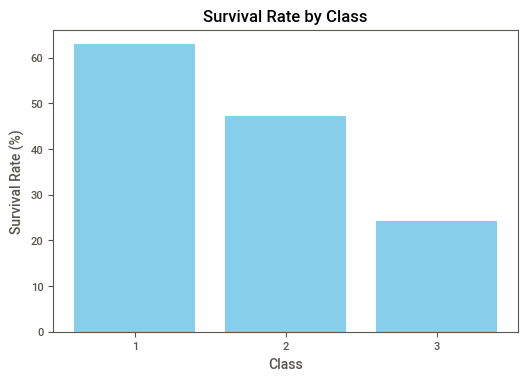

In [ ]:
# determing which factor has impact on survival
# looking at relationship between survival with class, gender, age , fare

#  creating lists to store class and survival rates
pclass_list = []
survived_percentages = []
# Get unique values of 'Pclass'
unique_pclasses = df['Pclass'].unique()

# Iterate over each unique value of 'Pclass'
for pclass in unique_pclasses:
    # Filter DataFrame to get rows where 'Pclass' equals the current value
    filtered_df_class = df[df['Pclass'] == pclass]

    # Calculate the percentage of survivors for the current 'Pclass'
    survived_percentage = (filtered_df_class['Survived'].sum() / len(filtered_df_class)) * 100
#  adding results to list
    pclass_list.append(pclass)
    survived_percentages.append(survived_percentage)

    # Printing the result
    print(f"Percentage of passengers in Class {pclass} who survived: {survived_percentage:.2f}%")
#
#   creating bar plot to show results
plt.bar(pclass_list, survived_percentages, color='skyblue')
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate (%)')
plt.show()

Percentage of male passengers who survived: 15.08%
Percentage of female passengers who survived: 27.71%


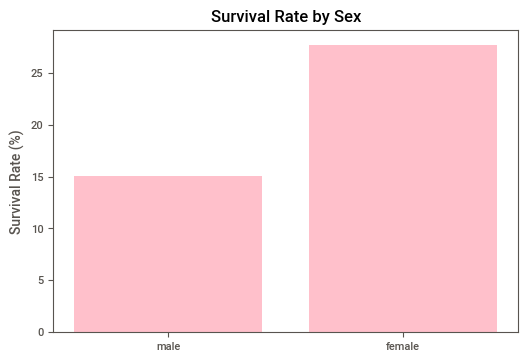

In [ ]:
#  survival by gender

sex_list = []
survived_percentages = []

unique_sex = df['Sex'].unique()

for sex in unique_sex:

    filtered_df_sex = df[df['Sex'] == sex]

    survived_percentage = (filtered_df_class['Survived'].sum() / len(filtered_df_sex)) * 100
#  adding results to list
    sex_list.append(sex)
    survived_percentages.append(survived_percentage)

    # Printing the result
    print(f"Percentage of {sex} passengers who survived: {survived_percentage:.2f}%")
#
#   creating bar plot to show results
plt.bar(sex_list, survived_percentages, color='pink')
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate (%)')
plt.show()




Text(0, 0.5, 'Age')

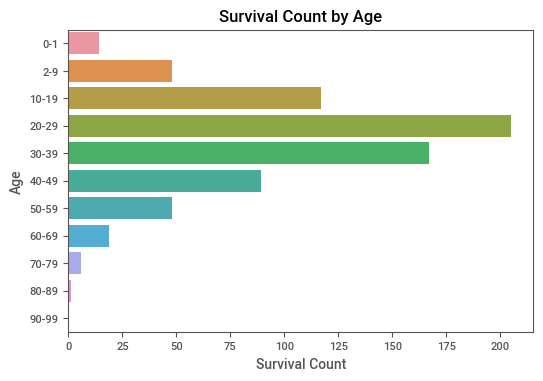

In [ ]:
#  survival count by age, grouping age to give clearer insight
df['Age_group'] = pd.cut(df['Age'], [0,1,9,20,29,39,49,59,69,79,89,99],
                   labels=['0-1', '2-9', '10-19', '20-29','30-39','40-49','50-59','60-69','70-79',
                           '80-89','90-99'])

plt.figure()
sns.countplot(y=df['Age_group'], data=df)
plt.title('Survival Count by Age')
plt.xlabel('Survival Count')
plt.ylabel('Age')



Percentage of passengers aged 0-1 who survived: 85.71%
Percentage of passengers aged 2-9 who survived: 54.17%
Percentage of passengers aged 10-19 who survived: 40.20%
Percentage of passengers aged 20-29 who survived: 35.00%
Percentage of passengers aged 30-39 who survived: 43.71%
Percentage of passengers aged 40-49 who survived: 38.20%
Percentage of passengers aged 50-59 who survived: 41.67%
Percentage of passengers aged 60-69 who survived: 31.58%


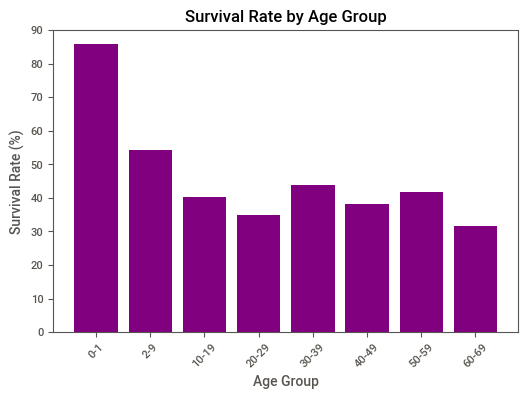

In [ ]:

# Define age groups
age_groups = ['0-1', '2-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69']
# omitting older than 70 because only 5 individuals (i.e. 100% of 80 year ols survived because only one person)

# create lists to store age group and corresponding survival percentages
age_group_list = []
survived_percentages = []

# iterate over each age group
for age_group in age_groups:
    # spliting age group into start and end values
    start_age, end_age = map(int, age_group.split('-'))

    # filtering df to get rows within the current age group
    filtered_df_age = df[(df['Age'] >= start_age) & (df['Age'] <= end_age)]

    # calculate the percentage of survivors for the current age group
    survived_percentage = (filtered_df_age['Survived'].sum() / len(filtered_df_age)) * 100

    age_group_list.append(age_group)
    survived_percentages.append(survived_percentage)

    print(f"Percentage of passengers aged {age_group} who survived: {survived_percentage:.2f}%")

plt.bar(age_group_list, survived_percentages, color='purple')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')
plt.show()


# **Answers:**
1. The most important factor determining survival was class and sex, with women having a 27% survival rate compared to 15% for men. Similarly, the upper class passengers were more likely to survive.
2. Yes, it appears that upper class passengers were favoured by the lifeboats because the data show that the first class passengers had a survival rate of over 62% while third class passengers only had a survival rate of 24.24%.
3. The data suggest that women and children were prioritised in evacuation, the survival rate for women was almost twice that of men. Similarly, the survival rate for children under 10 is comparatively high compared to other age groups.
4. For the babies on board (aged under one years old), the survival rate was approximately 85%.